<a href="https://colab.research.google.com/github/thvarsha00/Social-Media-User-Behavior-Analysis-Modeling/blob/main/Social_Media_User_Behavior_Analysis_%26_Modeling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Project: Social Media User Behavior Analysis & Modeling With Machine Learning***

# **Problem Statement**

 How can we analyze social media activity data to discover hidden user engagement groups and build predictive models to classify users into these categories for personalization and marketing?

# **Project Summary**

Social media platforms generate huge amounts of user activity data such as likes, comments, shares, time spent, and posting frequency. This raw data alone doesn’t reveal user engagement levels or behavior categories.

By combining unsupervised learning (clustering) and supervised learning (classification), we can:

Segment users into meaningful engagement groups.

Predict engagement categories for new users.

Provide actionable insights for content personalization, targeted ads, and retention strategies

# **Project Objectives**

The main objectives of this project are:

1.Analyze social media user activity data through EDA to understand distribution, patterns, and correlations.

2.Perform hypothesis testing to validate assumptions about user behavior (e.g., likes vs engagement).

3.Cluster users (unsupervised learning) into distinct engagement groups using PCA + K-Means, Hierarchical, and DBSCAN.

4.Build classification models (supervised learning) to predict engagement levels for new users.

5.Validate and evaluate models using proper metrics (Silhouette Score, Accuracy, Precision, Recall, F1, ROC-AUC).

6.Optimize performance through hyperparameter tuning (GridSearchCV, parameter sweeps).

7.Generate insights and recommendations to support personalized marketing, ad targeting, and retention strategies.

# **Dataset Summary: Social Media Engagement Dataset**

This dataset from Kaggle contains user engagement metrics on social media platforms. It includes features such as:

User activity (likes, comments, shares, posts)

Engagement patterns (time spent, session duration, frequency of activity)

Demographics (age group, gender, region)

Behavioral metrics (content preferences, device usage, interaction type)

**Use Cases**:

Exploratory Data Analysis (EDA) of social media behavior

Clustering users into engagement segments

Predictive modeling of user activity

Hypothesis testing on engagement trends

#   ***1.IMPORT REQUIRED LIBRARIES***

In [1]:


# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Clustering (Unsupervised)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Model Selection & Training (Supervised)
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Evaluation Metrics
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score,
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve, auc
)

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


# ***2.LOAD DATASET***

In [2]:
from google.colab import files
import pandas as pd

uploaded = files.upload()



Saving Social Media Engagement Dataset.csv to Social Media Engagement Dataset (2).csv


# ***3.DATA INSPECTION***

In [3]:

df = pd.read_csv("Social Media Engagement Dataset.csv")

print("Dataset Shape:", df.shape)


Dataset Shape: (12000, 28)


# Check the first 5 rows

In [4]:
print(df.head())

        post_id            timestamp day_of_week   platform        user_id  \
0  kcqbs6hxybia  2024-12-09 11:26:15      Monday  Instagram  user_52nwb0a6   
1  vkmervg4ioos  2024-07-28 19:59:26      Sunday    Twitter  user_ucryct98   
2  memhx4o1x6yu  2024-11-23 14:00:12    Saturday     Reddit  user_7rrev126   
3  bhyo6piijqt9  2024-09-16 04:35:25      Monday    YouTube  user_4mxuq0ax   
4  c9dkiomowakt  2024-09-05 21:03:01    Thursday    Twitter  user_l1vpox2k   

               location language  \
0  Melbourne, Australia       pt   
1          Tokyo, Japan       ru   
2        Beijing, China       ru   
3        Lagos, Nigeria       en   
4       Berlin, Germany       hi   

                                        text_content  \
0  Just tried the Chromebook from Google. Best pu...   
1  Just saw an ad for Microsoft Surface Laptop du...   
2  What's your opinion about Nike's Epic React?  ...   
3  Bummed out with my new Diet Pepsi from Pepsi! ...   
4  Just tried the Corolla from Toy

# Check dataset info

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post_id                  12000 non-null  object 
 1   timestamp                12000 non-null  object 
 2   day_of_week              12000 non-null  object 
 3   platform                 12000 non-null  object 
 4   user_id                  12000 non-null  object 
 5   location                 12000 non-null  object 
 6   language                 12000 non-null  object 
 7   text_content             12000 non-null  object 
 8   hashtags                 12000 non-null  object 
 9   mentions                 8059 non-null   object 
 10  keywords                 12000 non-null  object 
 11  topic_category           12000 non-null  object 
 12  sentiment_score          12000 non-null  float64
 13  sentiment_label          12000 non-null  object 
 14  emotion_type          

#  Check basic statistics for numerical columns

In [6]:
print(df.describe())

       sentiment_score  toxicity_score  likes_count  shares_count  \
count     12000.000000    12000.000000  12000.00000  12000.000000   
mean          0.000553        0.503868   2490.72025   1007.167167   
std           0.583563        0.288198   1441.53253    575.072282   
min          -0.999800        0.000000      0.00000      0.000000   
25%          -0.503200        0.251400   1236.00000    510.000000   
50%          -0.006200        0.505950   2496.00000   1018.000000   
75%           0.513525        0.756200   3723.25000   1501.000000   
max           0.999900        0.999900   5000.00000   2000.000000   

       comments_count   impressions  engagement_rate  user_past_sentiment_avg  \
count     12000.00000  12000.000000     12000.000000             12000.000000   
mean        504.34575  49811.338500         0.278137                 0.001472   
std         288.68416  28930.289451         1.149206                 0.576627   
min           0.00000    130.000000         0.001880  

# List all columns

In [7]:
print(df.columns.tolist())

['post_id', 'timestamp', 'day_of_week', 'platform', 'user_id', 'location', 'language', 'text_content', 'hashtags', 'mentions', 'keywords', 'topic_category', 'sentiment_score', 'sentiment_label', 'emotion_type', 'toxicity_score', 'likes_count', 'shares_count', 'comments_count', 'impressions', 'engagement_rate', 'brand_name', 'product_name', 'campaign_name', 'campaign_phase', 'user_past_sentiment_avg', 'user_engagement_growth', 'buzz_change_rate']


# ***4.DATA PREPROCESSING***

# Check for missing values

In [8]:
missing = df.isnull().sum()
print(missing)

post_id                       0
timestamp                     0
day_of_week                   0
platform                      0
user_id                       0
location                      0
language                      0
text_content                  0
hashtags                      0
mentions                   3941
keywords                      0
topic_category                0
sentiment_score               0
sentiment_label               0
emotion_type                  0
toxicity_score                0
likes_count                   0
shares_count                  0
comments_count                0
impressions                   0
engagement_rate               0
brand_name                    0
product_name                  0
campaign_name                 0
campaign_phase                0
user_past_sentiment_avg       0
user_engagement_growth        0
buzz_change_rate              0
dtype: int64


# Handle the missing mentions

In [9]:
df['mentions'] = df['mentions'].fillna('None')


#  Check for missing values

In [10]:
missing = df.isnull().sum()
print(missing)

post_id                    0
timestamp                  0
day_of_week                0
platform                   0
user_id                    0
location                   0
language                   0
text_content               0
hashtags                   0
mentions                   0
keywords                   0
topic_category             0
sentiment_score            0
sentiment_label            0
emotion_type               0
toxicity_score             0
likes_count                0
shares_count               0
comments_count             0
impressions                0
engagement_rate            0
brand_name                 0
product_name               0
campaign_name              0
campaign_phase             0
user_past_sentiment_avg    0
user_engagement_growth     0
buzz_change_rate           0
dtype: int64


# Check for duplicates

In [11]:

duplicates = df.duplicated(subset='post_id').sum()
print(f"Number of duplicate posts: {duplicates}")



Number of duplicate posts: 0


# Convert timestamp to datetime & extract features

In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour


# encode categorical

In [13]:
df = pd.get_dummies(df, columns=['platform', 'day_of_week', 'language'], drop_first=True)


# ***5.PREPROCESS SOCIAL MEDIA DATA***

# Why Preprocess Social Media Text

Clean messy text: Remove URLs, punctuation, extra spaces, and lowercase all text to make it consistent.

Focus on meaningful words: Remove stopwords (like “the”, “is”) and lemmatize words (e.g., “running” → “run”) to reduce noise.

Handle hashtags & mentions: Convert them into clean lists to analyze trends, user interactions, or influencer impact.

Enable accurate analysis: Preprocessed text is ready for NLP tasks like sentiment analysis, topic modeling, or keyword extraction.

Improve model performance: Clean, structured text helps machine learning models and analytics generate reliable insights.

# Import NLP libraries

In [14]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Define text preprocessing function

In [15]:
def clean_text(text):
    if pd.isna(text):
        return ""
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (#tag)
    text = re.sub(r'#\w+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra spaces
    text = text.strip()
    return text


# Lemmatization & stopword removal

In [16]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = clean_text(text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)


# Apply preprocessing to text_conten

In [17]:
df['clean_text_content'] = df['text_content'].apply(preprocess_text)


# Process hashtags

Split multiple hashtags by comma.

Remove # symbol and lowercase.

In [18]:
def process_hashtags(text):
    if text == 'None' or pd.isna(text):
        return []
    return [tag.strip().replace('#','').lower() for tag in text.split(',')]

df['clean_hashtags'] = df['hashtags'].apply(process_hashtags)


# Process mentions

Remove @ and split multiple mentions.

In [19]:
def process_mentions(text):
    if text == 'None' or pd.isna(text):
        return []
    return [mention.strip().replace('@','').lower() for mention in text.split(',')]

df['clean_mentions'] = df['mentions'].apply(process_mentions)


# Keyword Extraction
using TF-IDF
 Purpose: Identifies the most important words across all posts

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=50, stop_words='english')  # top 50 keywords
tfidf_matrix = tfidf.fit_transform(df['clean_text_content'])

# Get keywords
keywords = tfidf.get_feature_names_out()
print("Top Keywords:", keywords)


Top Keywords: ['absolutely' 'ad' 'adidas' 'amazon' 'apple' 'asap' 'attended' 'cocacola'
 'coming' 'comparing' 'competition' 'curious' 'disappointed' 'event'
 'exceeded' 'expectation' 'experience' 'experienced' 'feedback' 'galaxy'
 'google' 'hearing' 'interested' 'issue' 'know' 'let' 'love' 'loving'
 'microsoft' 'money' 'new' 'nike' 'penny' 'pepsi' 'quality' 'really'
 'recommend' 'returning' 'review' 'samsung' 'saw' 'think' 'thought'
 'toyota' 'tried' 'unboxed' 'wait' 'whats' 'worth' 'yesterday']


# Topic Modeling
Purpose: Groups posts into meaningful themes or topics.

What is LDA?

Latent Dirichlet Allocation is a probabilistic topic modeling algorithm used in Natural Language Processing (NLP) to discover hidden topics in a collection of documents.

It assumes that each document is a mixture of topics, and each topic is a mixture of words.



In [21]:
from sklearn.decomposition import LatentDirichletAllocation

# Use the same TF-IDF matrix
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(tfidf_matrix)

# Display top words for each topic
for i, topic in enumerate(lda.components_):
    top_words = [tfidf.get_feature_names_out()[index] for index in topic.argsort()[-10:]]
    print(f"Topic {i+1}: {top_words}")


Topic 1: ['expectation', 'exceeded', 'disappointed', 'quality', 'unboxed', 'know', 'think', 'let', 'new', 'pepsi']
Topic 2: ['experience', 'curious', 'samsung', 'returning', 'asap', 'coming', 'wait', 'galaxy', 'whats', 'experienced']
Topic 3: ['absolutely', 'money', 'yesterday', 'attended', 'event', 'experience', 'curious', 'worth', 'saw', 'ad']
Topic 4: ['tried', 'nike', 'google', 'cocacola', 'recommend', 'review', 'comparing', 'competition', 'feedback', 'love']
Topic 5: ['toyota', 'review', 'tried', 'wait', 'coming', 'whats', 'thought', 'hearing', 'really', 'interested']


# Sentiment & Emotion Analysis

In [22]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['predicted_sentiment'] = df['clean_text_content'].apply(get_sentiment)


# Sentiment/Emotion Analysis

In [23]:
!pip install transformers torch


In [24]:

from transformers import pipeline

# Create an emotion analysis pipeline
emotion_classifier = pipeline("text-classification",
                              model="j-hartmann/emotion-english-distilroberta-base",
                              return_all_scores=True)


Device set to use cpu


# Define a function to get emotions

In [25]:
def get_emotion(text):
    try:
        result = emotion_classifier(text[:512])  # limit to first 512 chars
        # Convert list of dicts to emotion with highest score
        emotions = {d['label']: d['score'] for d in result[0]}
        # Return the emotion with max score
        primary_emotion = max(emotions, key=emotions.get)
        return primary_emotion
    except:
        return "Unknown"


# Apply emotion analysis to your dataset

In [26]:
df['predicted_emotion'] = df['clean_text_content'].apply(get_emotion)

# Check results
df[['clean_text_content', 'predicted_emotion']].head(10)


clean_text_content predicted_emotion
0  tried chromebook google best purchase ever rea...          surprise
1  saw ad microsoft surface laptop springblast202...          surprise
2  whats opinion nike epic react really intereste...          surprise
3   bummed new diet pepsi pepsi disappointed quality           sadness
4  tried corolla toyota absolutely loving really ...               joy
5  nike powerrelease subpar cant wait see whats c...          surprise
6       sure new pepsi wild cherry pepsi worth money           neutral
7  saw ad cocacola coke zero launchwave worth eve...          surprise
8  tried coke zero cocacola absolutely loving wou...           neutral
9  one week review google pixel watch disappointe...          surprise

# Count posts per emotion

Posts per emotion:
 predicted_emotion
surprise    4809
neutral     3482
sadness     1853
joy         1687
anger        146
fear          16
disgust        7
Name: count, dtype: int64


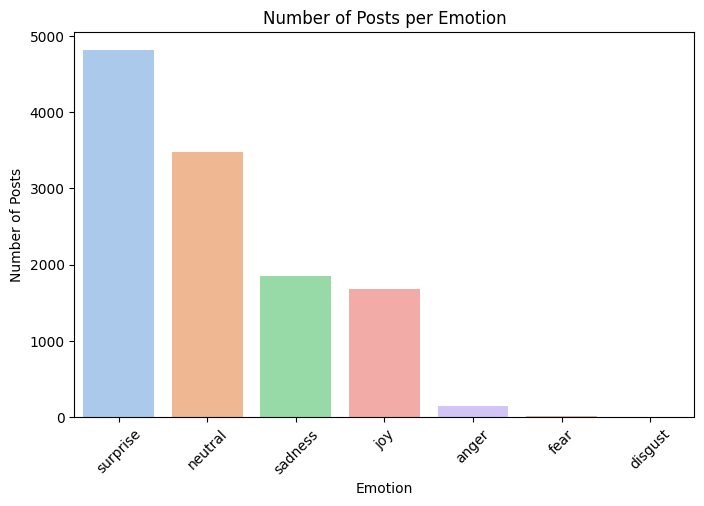

In [27]:
# Count number of posts per emotion
emotion_counts = df['predicted_emotion'].value_counts()
print("Posts per emotion:\n", emotion_counts)

# Optional: visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='pastel')
plt.title("Number of Posts per Emotion")
plt.ylabel("Number of Posts")
plt.xlabel("Emotion")
plt.xticks(rotation=45)
plt.show()


# **6.FEATURE ENGINEERING**

# Total Engagement
Combine likes, shares, and comments into one metric

In [28]:
df['total_engagement'] = df['likes_count'] + df['shares_count'] + df['comments_count']


# Time-Based Features
Extract hour, day, month

In [29]:







df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['day_of_week_num'] = df['timestamp'].dt.dayofweek  # Monday=0, Sunday=6


# CONTENT FEATURES

# Number of hashtags

In [30]:
df['num_hashtags'] = df['clean_hashtags'].apply(len)


# Number of mentions

In [31]:
df['num_mentions'] = df['clean_mentions'].apply(len)


# Text length

Number of words

Number of characters

In [32]:
df['text_word_count'] = df['clean_text_content'].apply(lambda x: len(x.split()))
df['text_char_count'] = df['clean_text_content'].apply(len)


# Engagement per Impression

In [33]:
df['engagement_per_impression'] = df['total_engagement'] / df['impressions']


# **CONTENT ANALYSIS USING NEWLY FEATURED VALUES**

# Keyword Extraction using TF-IDF
Purpose: Identify trending words across all posts for content insight.

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=50, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['clean_text_content'])

# Top keywords
top_keywords = tfidf.get_feature_names_out()
print("Top Keywords across posts:", top_keywords)


Top Keywords across posts: ['absolutely' 'ad' 'adidas' 'amazon' 'apple' 'asap' 'attended' 'cocacola'
 'coming' 'comparing' 'competition' 'curious' 'disappointed' 'event'
 'exceeded' 'expectation' 'experience' 'experienced' 'feedback' 'galaxy'
 'google' 'hearing' 'interested' 'issue' 'know' 'let' 'love' 'loving'
 'microsoft' 'money' 'new' 'nike' 'penny' 'pepsi' 'quality' 'really'
 'recommend' 'returning' 'review' 'samsung' 'saw' 'think' 'thought'
 'toyota' 'tried' 'unboxed' 'wait' 'whats' 'worth' 'yesterday']


# Topic Modeling using LDA

Purpose: Group posts into meaningful topics/themes.

In [35]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(tfidf_matrix)

# Show top words per topic
for i, topic in enumerate(lda.components_):
    top_words = [tfidf.get_feature_names_out()[index] for index in topic.argsort()[-10:]]
    print(f"Topic {i+1}: {top_words}")


Topic 1: ['expectation', 'exceeded', 'disappointed', 'quality', 'unboxed', 'know', 'think', 'let', 'new', 'pepsi']
Topic 2: ['experience', 'curious', 'samsung', 'returning', 'asap', 'coming', 'wait', 'galaxy', 'whats', 'experienced']
Topic 3: ['absolutely', 'money', 'yesterday', 'attended', 'event', 'experience', 'curious', 'worth', 'saw', 'ad']
Topic 4: ['tried', 'nike', 'google', 'cocacola', 'recommend', 'review', 'comparing', 'competition', 'feedback', 'love']
Topic 5: ['toyota', 'review', 'tried', 'wait', 'coming', 'whats', 'thought', 'hearing', 'really', 'interested']


# Hashtag Analysis
Purpose: Identify trending hashtags used by users or brands

In [36]:
from collections import Counter

all_hashtags = [hashtag for hashtags in df['clean_hashtags'] for hashtag in hashtags]
hashtag_counts = Counter(all_hashtags).most_common(20)  # top 20
print("Top Hashtags:", hashtag_counts)


Top Hashtags: [('fitness', 885), ('reviews', 884), ('bestvalue', 870), ('specialoffer', 849), ('promo', 847), ('fashion', 846), ('trending', 845), ('health', 845), ('premium', 845), ('sustainable', 844), ('musthave', 843), ('affordable', 842), ('beauty', 835), ('deal', 833), ('trendalert', 833), ('lifestyle', 832), ('eco', 831), ('travel', 830), ('newrelease', 819), ('food', 817)]


# Mention Analysis
Purpose: See which users/brands are most tagged in posts

In [37]:
all_mentions = [mention for mentions in df['clean_mentions'] for mention in mentions]
mention_counts = Counter(all_mentions).most_common(20)  # top 20
print("Top Mentions:", mention_counts)


Top Mentions: [('industryexpert', 866), ('retailsupport', 843), ('techhelp', 838), ('brandceo', 826), ('celebrityname', 825), ('influencername', 824), ('brandsupport', 818), ('productteam', 809), ('competitorbrand', 800), ('styleguide', 798), ('trendsetter', 796), ('reviewsite', 795), ('customerservice', 778), ('marketingteam', 771), ('newsoutlet', 751)]


# **7.EXPLORATORY DATA ANALYSIS**

# Setup

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


# **UNIVARIATE ANALYSIS**

In [39]:
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Reconstruct categorical columns

In [40]:
# Platform
platform_cols = ['platform_Instagram', 'platform_Reddit', 'platform_Twitter', 'platform_YouTube']
df['platform'] = df[platform_cols].idxmax(axis=1).str.replace('platform_', '')

# Day of Week
day_cols = ['day_of_week_Monday','day_of_week_Tuesday','day_of_week_Wednesday',
            'day_of_week_Thursday','day_of_week_Saturday','day_of_week_Sunday']
df['day_of_week'] = df[day_cols].idxmax(axis=1).str.replace('day_of_week_','')


#  1. Sentiment Distribution

Insight:

Shows the overall sentiment of posts.

Example: Majority positive posts indicate favorable engagement, while negative posts highlight customer complaints or dissatisfaction

In [41]:
sentiment_counts = df['predicted_sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

fig = px.bar(sentiment_counts,
             x='sentiment', y='count',
             color='sentiment', text='count',
             title='Sentiment Distribution')
fig.show()



# 2. Emotion Distribution

Insight:

Reveals which emotions dominate social media discussions.

For example, “joy” or “neutral” posts may dominate, while “anger” indicates issues with products/brands.

In [42]:
emotion_counts = df['predicted_emotion'].value_counts().reset_index()
emotion_counts.columns = ['emotion', 'count']

fig = px.pie(emotion_counts, names='emotion', values='count',
             title='Emotion Distribution', color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

# 3. Posts per Platform

Insight:

Shows platform distribution.

E.g., Instagram may have the most posts, Twitter less, indicating where most engagement happens.

In [43]:
platform_counts = df['platform'].value_counts().reset_index()
platform_counts.columns = ['platform', 'count']

fig = px.pie(platform_counts, values='count', names='platform', hole=0.5, title='Posts per Platform')
fig.show()


# 4.Posts per Brand
Insight: Highlights brands with maximum mentions; useful for monitoring trends.

In [44]:
brand_counts = df['brand_name'].value_counts().reset_index()
brand_counts.columns = ['brand', 'count']

fig = px.bar(brand_counts, x='brand', y='count', color='brand', text='count', title='Posts per Brand')
fig.show()


# 5.Total Engagement Distribution
Insight: Most posts have moderate engagement; a few posts are viral outliers.

In [45]:
fig = px.histogram(df, x='total_engagement', nbins=50, title='Total Engagement Distribution')
fig.show()


# 6. Engagement per Impression by Platform

Insight: Instagram and Reddit have high engagement per impression; YouTube lower.

In [46]:
fig = px.box(df, x='platform', y='engagement_per_impression', color='platform',
             title='Engagement per Impression by Platform')
fig.show()


# 7. Posts by Hour
Insight: Peak posting hours are around 12 PM–8 PM; useful for scheduling.

In [47]:
hour_counts = df['hour'].value_counts().sort_index().reset_index()
hour_counts.columns = ['hour', 'count']

fig = px.line(hour_counts, x='hour', y='count', markers=True, title='Posts by Hour')
fig.show()


# 8. Posts by Day of Week
Insight: Monday and Thursday have highest activity; weekend lower.

In [48]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_counts = df['day_of_week'].value_counts().reindex(day_order).reset_index()
day_counts.columns = ['day', 'count']

fig = px.bar(day_counts, x='day', y='count', text='count', title='Posts by Day of Week')
fig.show()


# 9. Number of Hashtags per Post
Insight: Most posts use 1–3 hashtags; more hashtags sometimes increase reach.

In [49]:
fig = px.histogram(df, x='num_hashtags', nbins=20, title='Number of Hashtags per Post')
fig.show()


# 10.WordCloud of Text Content
Insight: Highlights trending words, brands, and topics for content strategy

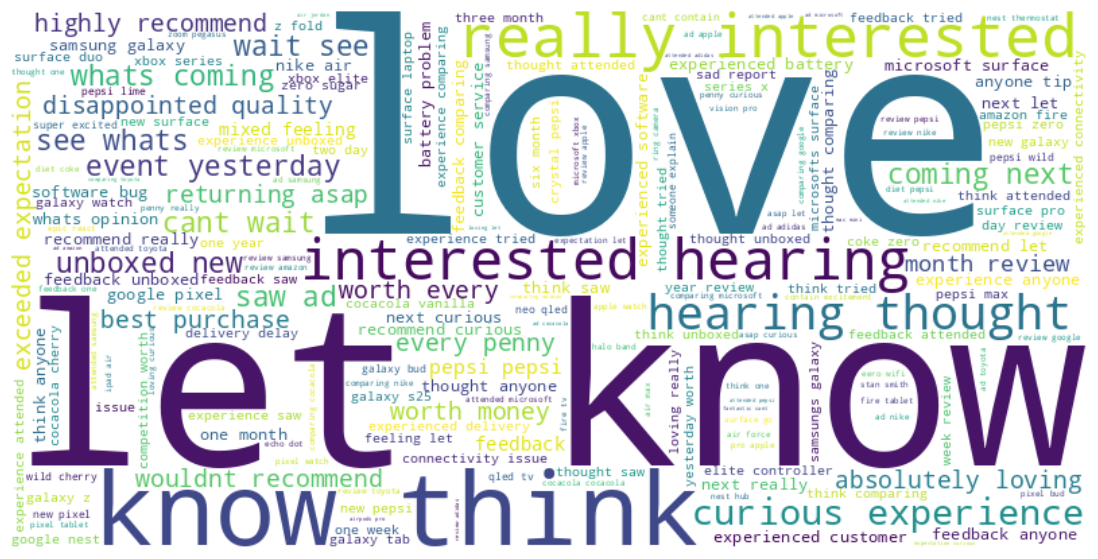

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['clean_text_content'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# **MULTIVARIATE PLOTS + INSIGHTS**

# 1. Emotion vs Sentiment (Heatmap)
Insight: Negative sentiment mostly maps to anger/sadness; positive to joy.

In [51]:
cross = pd.crosstab(df['predicted_sentiment'], df['predicted_emotion'])
fig = px.imshow(cross, text_auto=True, color_continuous_scale='Viridis', title='Emotion vs Sentiment')
fig.show()


# 2. Emotion vs Platform
Insight: Instagram shows more joy; Twitter has more anger/neutral posts.

In [52]:
platform_emotion = pd.crosstab(df['platform'], df['predicted_emotion'])
fig = px.bar(platform_emotion, x=platform_emotion.index, y=platform_emotion.columns,
             title='Emotion Distribution by Platform')
fig.show()


# 3. Emotion vs Brand
Insight: Monitors brand-specific emotions; brands with high anger posts need attention.

In [53]:

brand_emotion = pd.crosstab(df['brand_name'], df['predicted_emotion'])
fig = px.bar(brand_emotion, x=brand_emotion.index, y=brand_emotion.columns,
             title='Emotion Distribution by Brand')
fig.show()


# 4. Sentiment vs Total Engagement (Scatter)
Insight: Positive posts usually generate more engagement; negative posts may go viral if controversial.

In [54]:
fig = px.scatter(df, x='predicted_sentiment', y='total_engagement',
                 color='platform', size='total_engagement',
                 title='Sentiment vs Total Engagement')
fig.show()


# 5. Emotion vs Engagement per Impression
Insight: Joy and surprise posts often drive higher engagement per impression.

In [55]:
fig = px.box(df, x='predicted_emotion', y='engagement_per_impression',
             color='predicted_emotion', title='Emotion vs Engagement per Impression')
fig.show()


# 6. Platform vs Total Engagement (Violin)
Insight: Shows platform engagement spread; some posts on Reddit/Instagram achieve viral reach.

In [56]:
fig = px.violin(df, x='platform', y='total_engagement', color='platform', box=True, points='all',
                title='Total Engagement by Platform')
fig.show()


# 7. Brand vs Average Engagement per Impression
Insight: Shows which brands are getting maximum engagement relative to their audience.

In [57]:
avg_engagement = df.groupby('brand_name')['engagement_per_impression'].mean().reset_index()
fig = px.bar(avg_engagement, x='brand_name', y='engagement_per_impression',
             title='Average Engagement per Impression by Brand')
fig.show()


# 8. Top Hashtags vs Engagement
Insight: High-engagement hashtags can be reused for campaigns.

In [58]:
hashtag_engagement = df.explode('clean_hashtags').groupby('clean_hashtags')['total_engagement'].mean().reset_index()
top_hashtag_eng = hashtag_engagement.sort_values('total_engagement', ascending=False).head(20)

fig = px.scatter(top_hashtag_eng, x='clean_hashtags', y='total_engagement', size='total_engagement',
                 color='clean_hashtags', title='Top Hashtags vs Average Engagement')
fig.show()


# 9. Mentions vs Engagement
Insight: Influencer mentions can boost engagement; monitor brand mentions closely.

In [59]:
mention_engagement = df.explode('clean_mentions').groupby('clean_mentions')['total_engagement'].mean().reset_index()
top_mentions_eng = mention_engagement.sort_values('total_engagement', ascending=False).head(20)

fig = px.scatter(top_mentions_eng, x='clean_mentions', y='total_engagement', size='total_engagement',
                 color='clean_mentions', title='Top Mentions vs Average Engagement')
fig.show()


# 10. Animated Posts over Time
Insight:This will animate hourly posts across each day, so you can see trends over time.

In [60]:

df['date'] = pd.to_datetime(df['timestamp']).dt.date
daily_hourly_posts = df.groupby(['date','hour','platform']).size().reset_index(name='post_count')

fig = px.line(daily_hourly_posts, x='hour', y='post_count', color='platform', markers=True,
              line_group='platform', animation_frame='date', title='Posts by Hour over Days')
fig.show()


# **8.SUPERVISED LEARNING**

# Preprocessing & Feature Setup

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Features

num_cols = ['num_hashtags','num_mentions','text_word_count','text_char_count',
            'user_past_sentiment_avg','user_engagement_growth','buzz_change_rate','toxicity_score']
cat_cols = ['platform','brand_name','campaign_phase','day_of_week']
text_col = 'clean_text_content'

# Fill missing numeric values
df[num_cols] = df[num_cols].fillna(0)


# Targets

# Regression target
y_reg = df['engagement_rate']

# Classification target
y_clf = df['predicted_sentiment']


# Train-test split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    df[[*num_cols, *cat_cols, text_col]], y_reg, test_size=0.2, random_state=42)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    df[[*num_cols, *cat_cols, text_col]], y_clf, test_size=0.2, random_state=42)


# Preprocessing pipeline

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
    ('text', TfidfVectorizer(max_features=5000, stop_words='english'), text_col)
])


# 1.Random Forest Regressor

# Define Feature Groups

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Select features
numeric_features = ['num_hashtags', 'num_mentions', 'text_word_count',
                    'text_char_count', 'user_past_sentiment_avg',
                    'user_engagement_growth', 'buzz_change_rate', 'toxicity_score']

categorical_features = ['brand_name', 'campaign_phase', 'day_of_week']


# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


# Train/Test Split (Regression)

In [63]:
from sklearn.model_selection import train_test_split

X = df[numeric_features + categorical_features]
y = df['engagement_rate']   # regression target

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)


# Preprocessor

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


# Regression Models

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
])

rf_model.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_model.predict(X_test_reg)

mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf)

print(f"Random Forest Regressor - RMSE: {rmse_rf:.4f}, R2: {r2_rf:.4f}")


Random Forest Regressor - RMSE: 1.1676, R2: -0.0790


# Scatter Plot: Actual vs Predicted

Explanation / Insight:

Points on the red dashed line → perfect predictions

Points above the line → model over-predicts

Points below the line → model under-predicts

If points are widely scattered → model is not capturing the pattern well (like your negative R²)

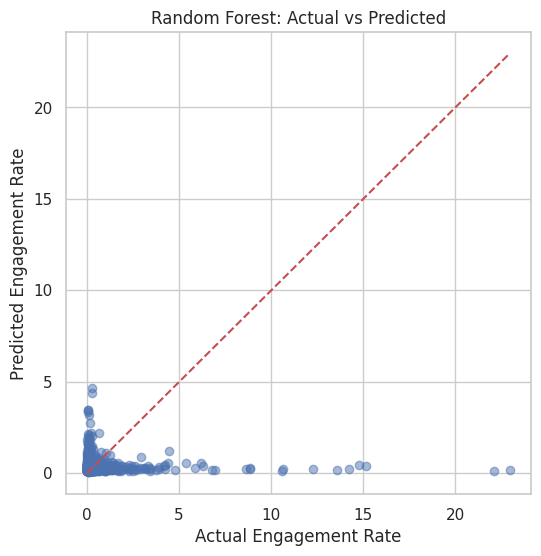

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test_reg, y_pred_rf, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual Engagement Rate')
plt.ylabel('Predicted Engagement Rate')
plt.title('Random Forest: Actual vs Predicted')
plt.show()


# Residual Plot

Explanation / Insight:

Residual = Actual − Predicted

Horizontal spread around 0 line → ideal; errors are random

Patterns / trends → model may be biased or missing features

Wide vertical spread → large prediction errors

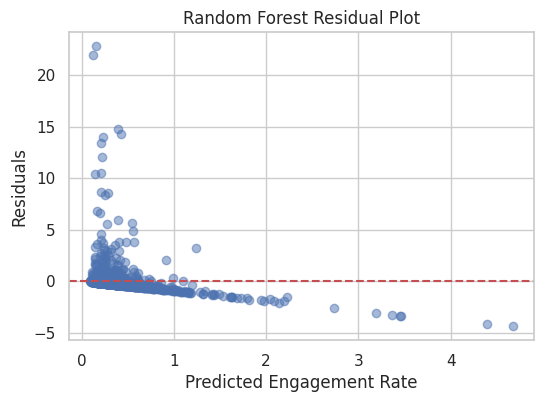

In [67]:
residuals = y_test_reg - y_pred_rf
plt.figure(figsize=(6,4))
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Engagement Rate')
plt.ylabel('Residuals')
plt.title('Random Forest Residual Plot')
plt.show()


# 2.Linear Regression

Linear Regression - RMSE: 1.1256, R2: -0.0028


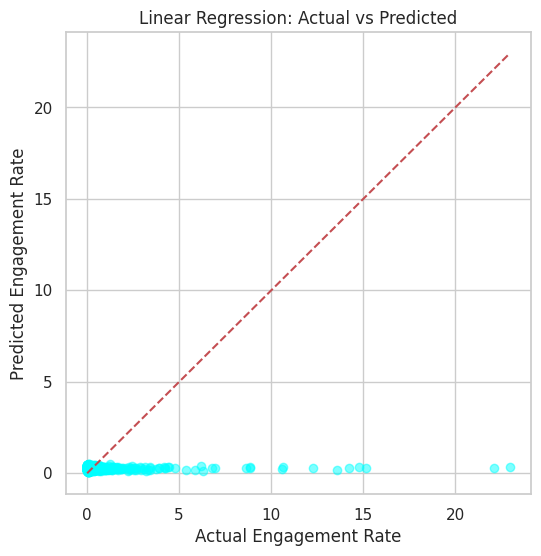

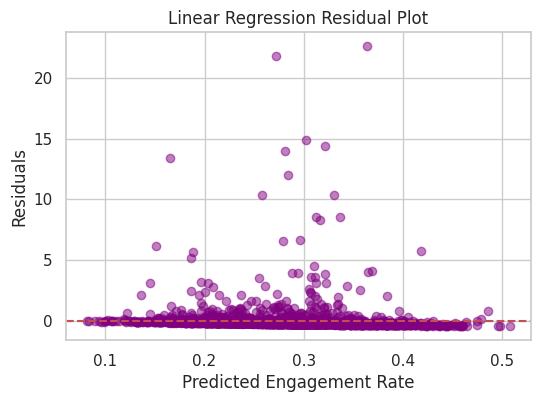

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Pipeline
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train
lr_model.fit(X_train_reg, y_train_reg)

# Predict
y_pred_lr = lr_model.predict(X_test_reg)

# Evaluate
mse_lr = mean_squared_error(y_test_reg, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test_reg, y_pred_lr)

print(f"Linear Regression - RMSE: {rmse_lr:.4f}, R2: {r2_lr:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test_reg, y_pred_lr, alpha=0.5, color='cyan')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual Engagement Rate')
plt.ylabel('Predicted Engagement Rate')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

# Residual plot
residuals_lr = y_test_reg - y_pred_lr
plt.figure(figsize=(6,4))
plt.scatter(y_pred_lr, residuals_lr, alpha=0.5, color='purple')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Engagement Rate')
plt.ylabel('Residuals')
plt.title('Linear Regression Residual Plot')
plt.show()


# 3.Gradient Boosting Regressor

Gradient Boosting Regressor - RMSE: 1.1575, R2: -0.0605


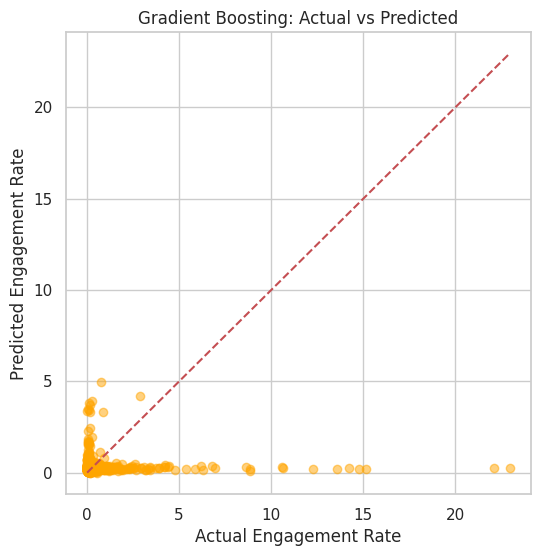

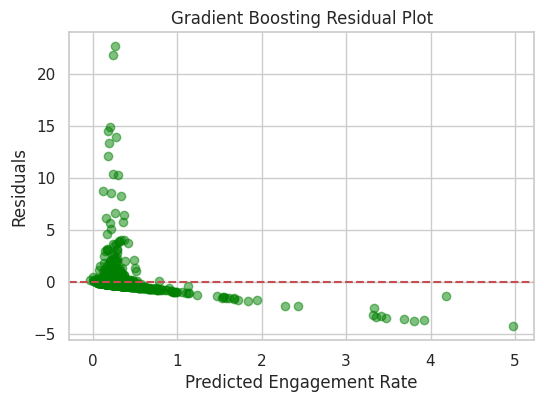

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

# Pipeline
gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=200, random_state=42))
])

# Train
gb_model.fit(X_train_reg, y_train_reg)

# Predict
y_pred_gb = gb_model.predict(X_test_reg)

# Evaluate
mse_gb = mean_squared_error(y_test_reg, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test_reg, y_pred_gb)

print(f"Gradient Boosting Regressor - RMSE: {rmse_gb:.4f}, R2: {r2_gb:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test_reg, y_pred_gb, alpha=0.5, color='orange')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual Engagement Rate')
plt.ylabel('Predicted Engagement Rate')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.show()

# Residual plot
residuals_gb = y_test_reg - y_pred_gb
plt.figure(figsize=(6,4))
plt.scatter(y_pred_gb, residuals_gb, alpha=0.5, color='green')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Engagement Rate')
plt.ylabel('Residuals')
plt.title('Gradient Boosting Residual Plot')
plt.show()


# Combined Comparison Visualization

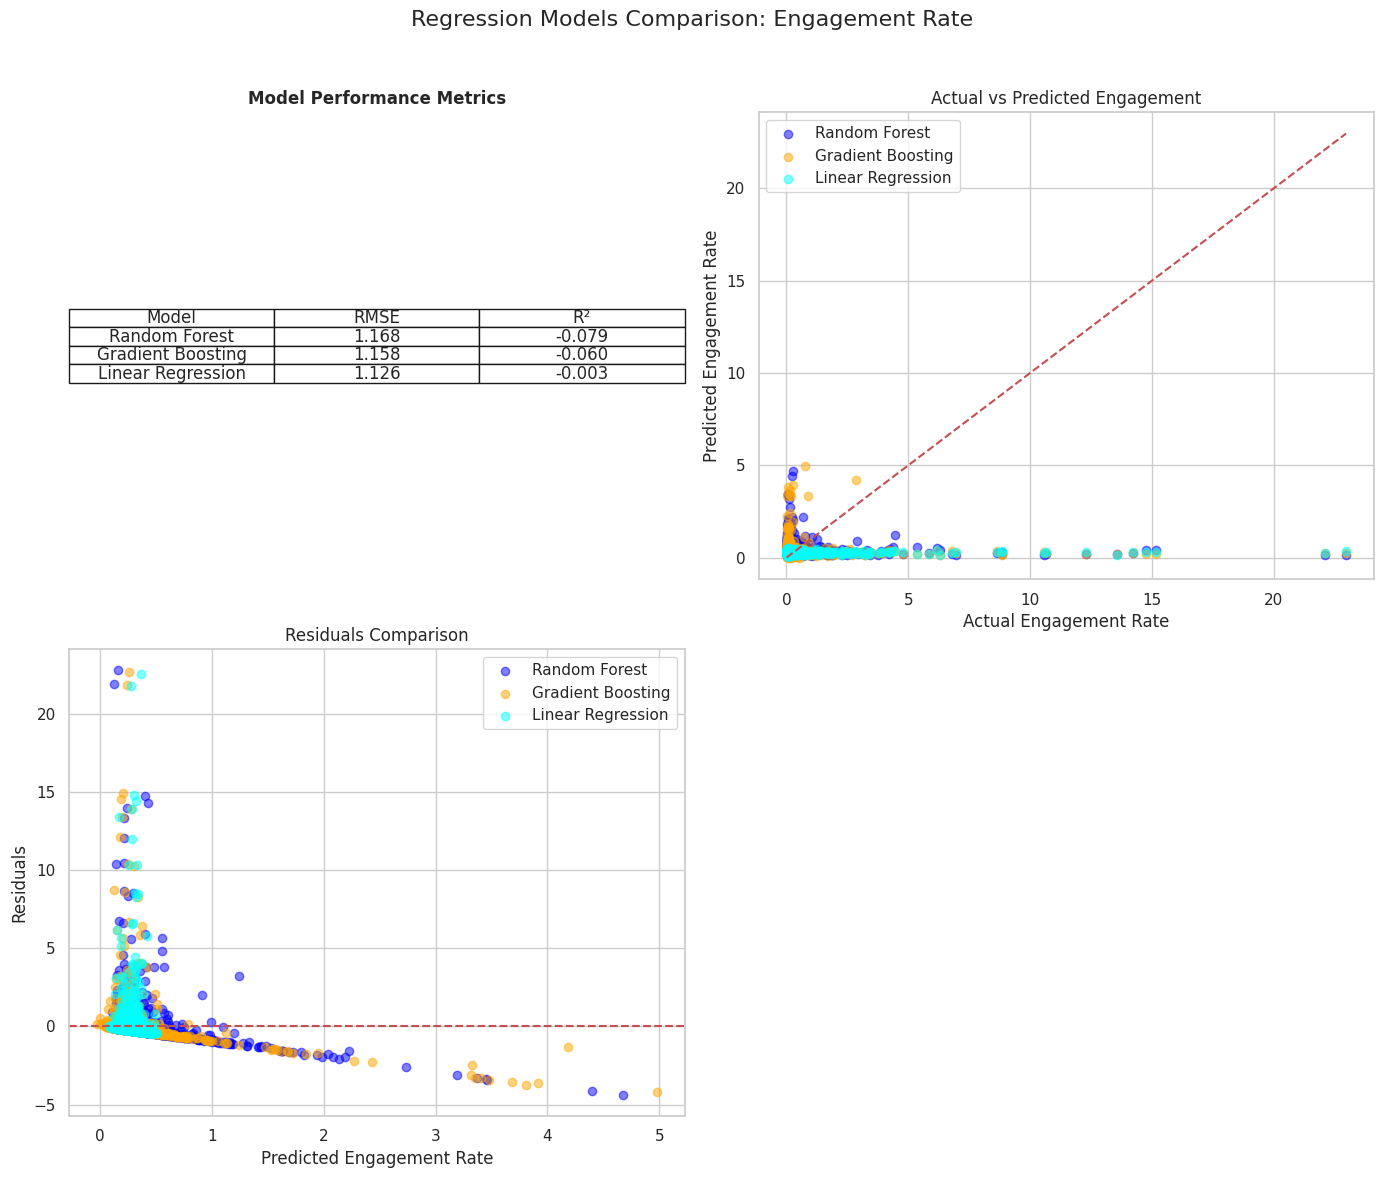

In [70]:
import matplotlib.pyplot as plt

# Prepare figure
fig, axes = plt.subplots(2, 2, figsize=(14,12))
fig.suptitle("Regression Models Comparison: Engagement Rate", fontsize=16)

#  RMSE & R² Table
axes[0,0].axis('off')
table_data = [
    ['Random Forest', f'{rmse_rf:.3f}', f'{r2_rf:.3f}'],
    ['Gradient Boosting', f'{rmse_gb:.3f}', f'{r2_gb:.3f}'],
    ['Linear Regression', f'{rmse_lr:.3f}', f'{r2_lr:.3f}']
]
table = axes[0,0].table(cellText=table_data, colLabels=['Model','RMSE','R²'], loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
axes[0,0].set_title('Model Performance Metrics', fontweight='bold')

#  Actual vs Predicted
axes[0,1].scatter(y_test_reg, y_pred_rf, alpha=0.5, label='Random Forest', color='blue')
axes[0,1].scatter(y_test_reg, y_pred_gb, alpha=0.5, label='Gradient Boosting', color='orange')
axes[0,1].scatter(y_test_reg, y_pred_lr, alpha=0.5, label='Linear Regression', color='cyan')
axes[0,1].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
axes[0,1].set_xlabel('Actual Engagement Rate')
axes[0,1].set_ylabel('Predicted Engagement Rate')
axes[0,1].set_title('Actual vs Predicted Engagement')
axes[0,1].legend()

# Residuals
axes[1,0].scatter(y_pred_rf, y_test_reg - y_pred_rf, alpha=0.5, label='Random Forest', color='blue')
axes[1,0].scatter(y_pred_gb, y_test_reg - y_pred_gb, alpha=0.5, label='Gradient Boosting', color='orange')
axes[1,0].scatter(y_pred_lr, y_test_reg - y_pred_lr, alpha=0.5, label='Linear Regression', color='cyan')
axes[1,0].axhline(0, color='r', linestyle='--')
axes[1,0].set_xlabel('Predicted Engagement Rate')
axes[1,0].set_ylabel('Residuals')
axes[1,0].set_title('Residuals Comparison')
axes[1,0].legend()

#  Placeholder
axes[1,1].axis('off')  # leave blank or add histogram of residuals if desired

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



# **CLASSIFICATION**

# Random Forest Classifier

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select the features for clustering
features_for_clustering = [
    'likes_count', 'shares_count', 'comments_count',
    'impressions', 'engagement_rate', 'sentiment_score',
    'user_engagement_growth'
]

# Create a new DataFrame with only these features
X_cluster = df[features_for_clustering]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

In [72]:
# Choose the number of clusters (e.g., 4)
k = 4

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Add the cluster labels back to your original DataFrame
df['cluster'] = kmeans.labels_

In [73]:
#. Define Features and Target

features = [
    'likes_count', 'shares_count', 'comments_count',
    'impressions', 'engagement_rate', 'sentiment_score',
    'user_engagement_growth'
]
X = df[features]

# The target (y) is the new 'cluster' column
y = df['cluster']


#  2. Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#  3. Train a Classification Model
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


#  4. Evaluate Your Model
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Print the results
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.98\n
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       723
           1       0.98      0.97      0.98       764
           2       0.98      0.98      0.98       901
           3       1.00      1.00      1.00        12

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400



# Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000, random_state=42) # max_iter helps with convergence
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_lr = log_reg.predict(X_test)

# Evaluate the model
print("--- Logistic Regression ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}\\n")
print(classification_report(y_test, y_pred_lr))

--- Logistic Regression ---
Accuracy: 0.87\n
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       723
           1       0.79      0.86      0.82       764
           2       0.90      0.84      0.87       901
           3       1.00      1.00      1.00        12

    accuracy                           0.87      2400
   macro avg       0.90      0.90      0.90      2400
weighted avg       0.87      0.87      0.87      2400



# Confusion Matrix + ROC-AUC curve for evaluation

--- Logistic Regression ---
Accuracy: 0.87

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       723
           1       0.79      0.86      0.82       764
           2       0.90      0.84      0.87       901
           3       1.00      1.00      1.00        12

    accuracy                           0.87      2400
   macro avg       0.90      0.90      0.90      2400
weighted avg       0.87      0.87      0.87      2400



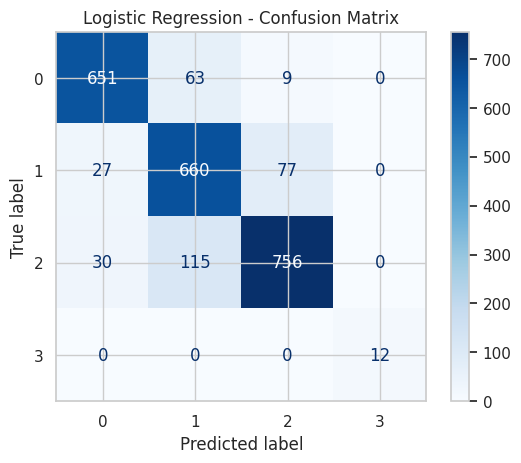

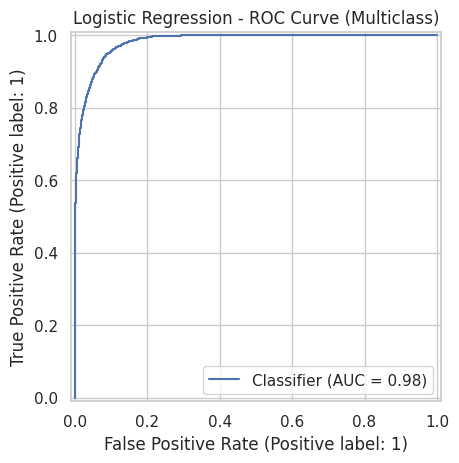

ROC-AUC Score (OVR): 0.9796773553450788


In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# ===============================
# Logistic Regression Evaluation
# ===============================
print("--- Logistic Regression ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}\n")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# ROC Curve & AUC (works for binary and multiclass)
if len(set(y_test)) == 2:  # binary classification
    y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Logistic Regression - ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

    print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr))

else:  # multi-class
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_auc_score, RocCurveDisplay

    # Binarize labels for One-vs-Rest ROC
    y_test_bin = label_binarize(y_test, classes=list(set(y_test)))
    y_prob_lr = log_reg.predict_proba(X_test)

    # Micro-average ROC
    RocCurveDisplay.from_predictions(y_test_bin.ravel(), y_prob_lr.ravel())
    plt.title("Logistic Regression - ROC Curve (Multiclass)")
    plt.show()

    print("ROC-AUC Score (OVR):", roc_auc_score(y_test_bin, y_prob_lr, multi_class="ovr"))


# Support Vector Machines (SVM)

In [76]:
from sklearn.svm import SVC

# Initialize and train the model
# The 'kernel' can be 'linear', 'poly', or 'rbf' (common choice)
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
print("--- Support Vector Machine (SVM) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}\\n")
print(classification_report(y_test, y_pred_svm))

--- Support Vector Machine (SVM) ---
Accuracy: 0.95\n
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       723
           1       0.97      0.96      0.97       764
           2       0.96      0.95      0.96       901
           3       0.00      0.00      0.00        12

    accuracy                           0.95      2400
   macro avg       0.72      0.72      0.72      2400
weighted avg       0.95      0.95      0.95      2400



--- Support Vector Machine (SVM) ---
Accuracy: 0.95

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       723
           1       0.97      0.96      0.97       764
           2       0.96      0.95      0.96       901
           3       0.00      0.00      0.00        12

    accuracy                           0.95      2400
   macro avg       0.72      0.72      0.72      2400
weighted avg       0.95      0.95      0.95      2400



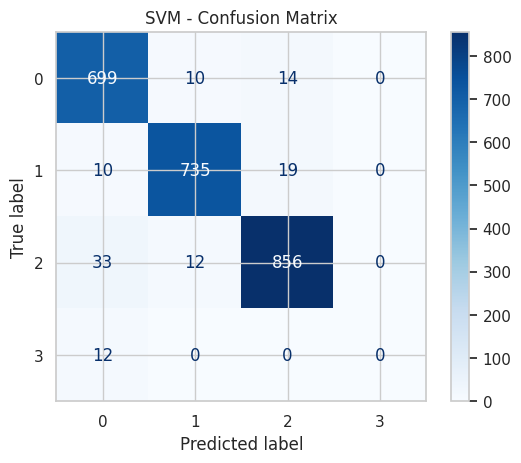

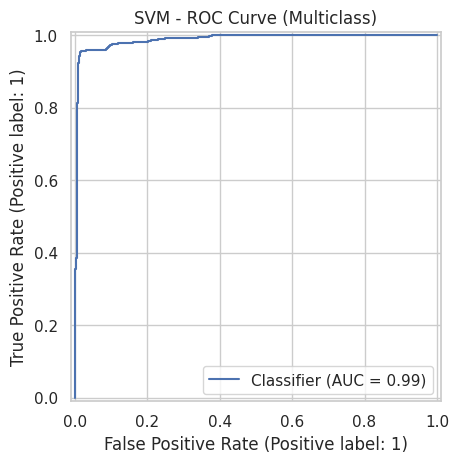

ROC-AUC Score (OVR): 0.9907140164996783


In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# ===============================
# Support Vector Machine (SVM)
# ===============================
print("--- Support Vector Machine (SVM) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}\n")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM - Confusion Matrix")
plt.show()

# ROC Curve & AUC
if len(set(y_test)) == 2:  # binary classification
    # Use decision_function for scores instead of predict_proba (since SVC doesn't always expose predict_proba)
    y_score = svm_classifier.decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("SVM - ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

    print("ROC-AUC Score:", roc_auc_score(y_test, y_score))

else:  # multiclass ROC
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_auc_score, RocCurveDisplay

    y_test_bin = label_binarize(y_test, classes=list(set(y_test)))
    y_score = svm_classifier.decision_function(X_test)

    RocCurveDisplay.from_predictions(y_test_bin.ravel(), y_score.ravel())
    plt.title("SVM - ROC Curve (Multiclass)")
    plt.show()

    print("ROC-AUC Score (OVR):", roc_auc_score(y_test_bin, y_score, multi_class="ovr"))


# Gradient Boosting Classifier


In [78]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
print("--- Gradient Boosting ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.2f}\\n")
print(classification_report(y_test, y_pred_gb))

--- Gradient Boosting ---
Accuracy: 0.98\n
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       723
           1       0.99      0.98      0.98       764
           2       0.98      0.98      0.98       901
           3       1.00      1.00      1.00        12

    accuracy                           0.98      2400
   macro avg       0.99      0.99      0.99      2400
weighted avg       0.98      0.98      0.98      2400



--- Gradient Boosting ---
Accuracy: 0.98

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       723
           1       0.99      0.98      0.98       764
           2       0.98      0.98      0.98       901
           3       1.00      1.00      1.00        12

    accuracy                           0.98      2400
   macro avg       0.99      0.99      0.99      2400
weighted avg       0.98      0.98      0.98      2400



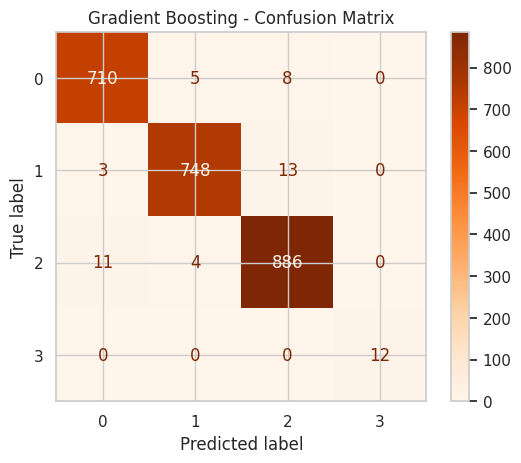

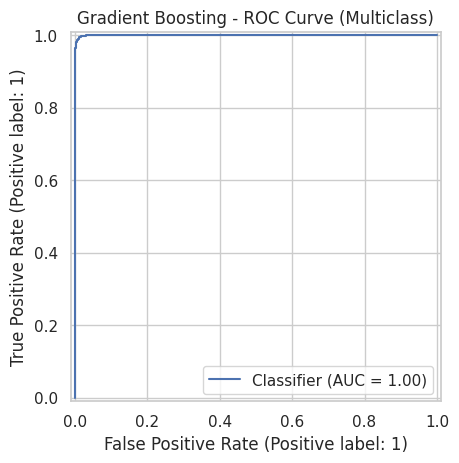

ROC-AUC Score (OVR): 0.9996457393621584


In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt


# Gradient Boosting Evaluation
print("--- Gradient Boosting ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.2f}\n")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Oranges)
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()

# ROC Curve & AUC
if len(set(y_test)) == 2:
    y_prob_gb = gb_classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob_gb)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Gradient Boosting - ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

    print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_gb))

else:  # multiclass
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_auc_score, RocCurveDisplay

    y_test_bin = label_binarize(y_test, classes=list(set(y_test)))
    y_prob_gb = gb_classifier.predict_proba(X_test)

    RocCurveDisplay.from_predictions(y_test_bin.ravel(), y_prob_gb.ravel())
    plt.title("Gradient Boosting - ROC Curve (Multiclass)")
    plt.show()

    print("ROC-AUC Score (OVR):", roc_auc_score(y_test_bin, y_prob_gb, multi_class="ovr"))


# **9.UNSUPERVISED**

# Scale the Data

Clustering algorithms (like KMeans, DBSCAN) are sensitive to scale.

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)   # use your features (without target)


# Dimensionality Reduction

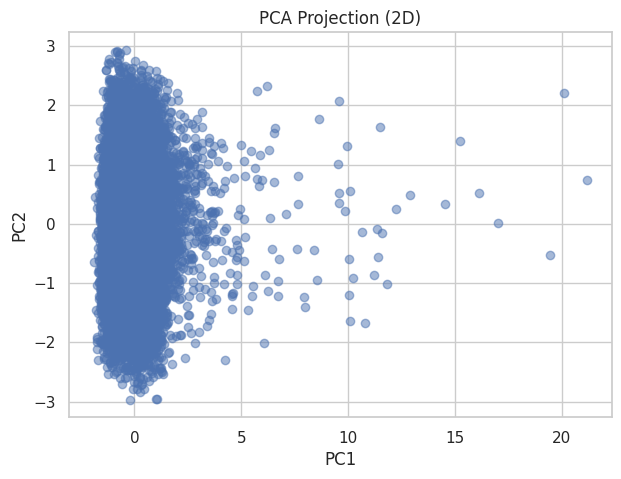

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.title("PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# KMeans Clustering

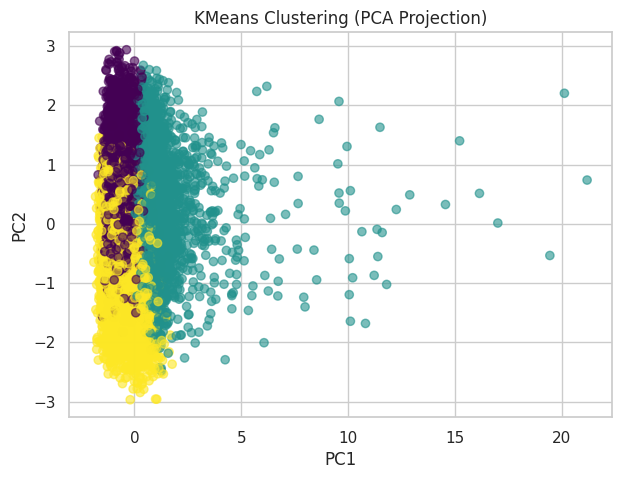

In [82]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)   # try different cluster numbers
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="viridis", alpha=0.6)
plt.title("KMeans Clustering (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# Evaluate Clusters

In [83]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("Silhouette Score:", silhouette_score(X_scaled, clusters))
print("Davies-Bouldin Score:", davies_bouldin_score(X_scaled, clusters))


Silhouette Score: 0.10774059769959408
Davies-Bouldin Score: 2.285209530798566


# DBSCAN (density-based clustering)

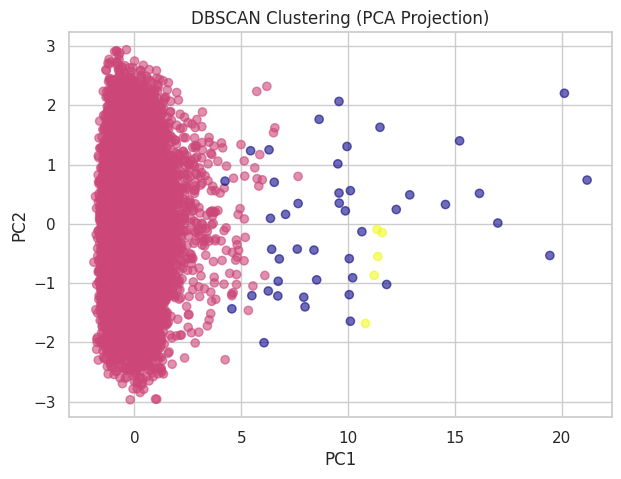

In [84]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=5)   # tune eps & min_samples
clusters_db = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_db, cmap="plasma", alpha=0.6)
plt.title("DBSCAN Clustering (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# Scale the Features

In [85]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)   # use your dataset features (no target column)


# Elbow Method (find best k)

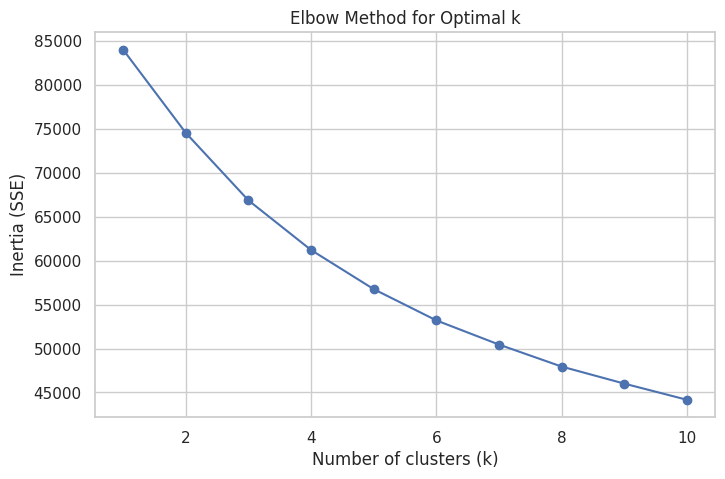

In [86]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []   # Sum of Squared Errors (inertia)

# Try k from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), sse, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.show()


# Train KMeans with Optimal k

In [87]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)


#  PCA for 2D Visualization

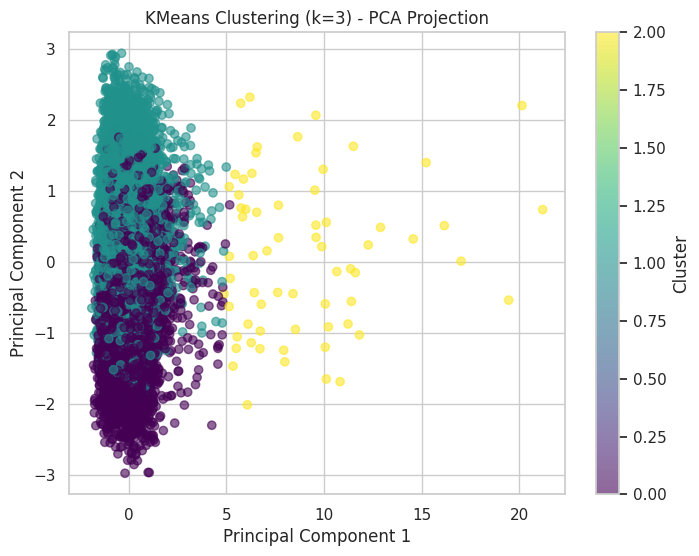

In [88]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="viridis", alpha=0.6)
plt.title(f"KMeans Clustering (k={optimal_k}) - PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()


# Cluster Quality (Silhouette Score)

In [89]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score for k={optimal_k}: {silhouette:.3f}")


Silhouette Score for k=3: 0.124


# Hierarchical Clustering (Dendrograms)

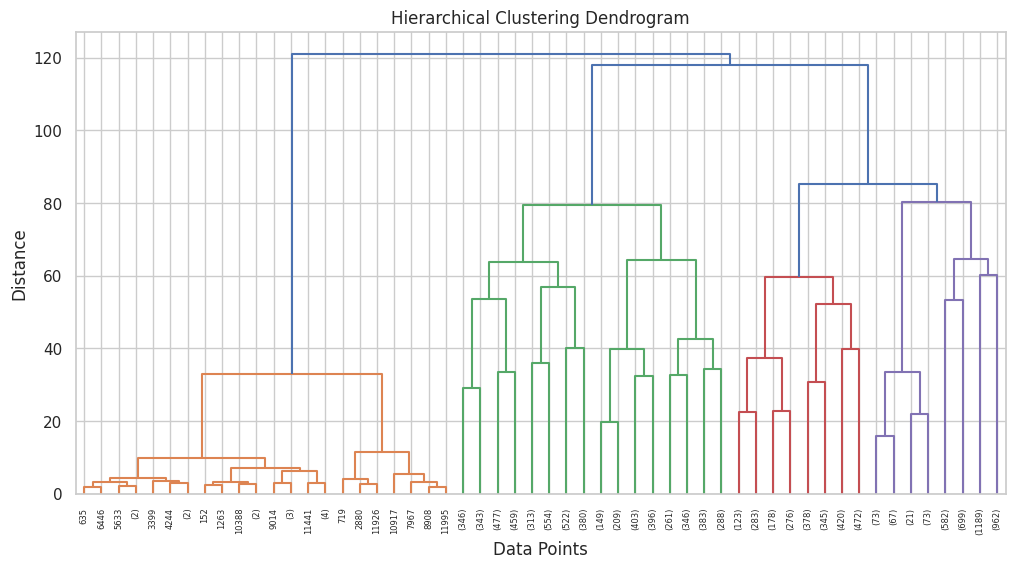

In [90]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Linkage for dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='level', p=5)  # show top 5 levels
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()



#  Agglomerative Clustering with chosen n_clusters ( 3)

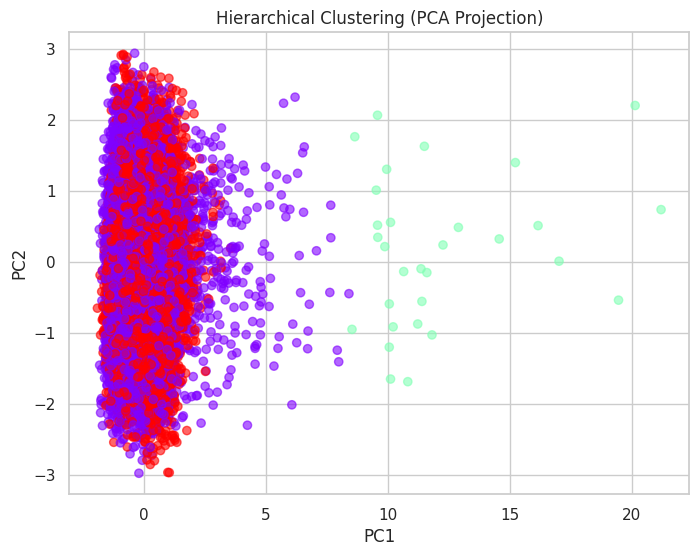

In [91]:

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters_hc = hc.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_hc, cmap='rainbow', alpha=0.6)
plt.title("Hierarchical Clustering (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# DBSCAN (Density-Based)

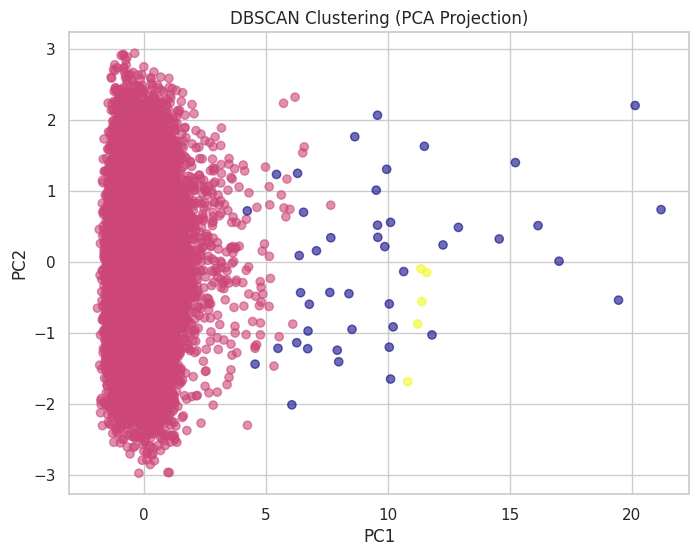

Number of clusters (excluding noise): 2
Noise points: 44


In [92]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=2, min_samples=5)  # tune eps & min_samples
clusters_db = db.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_db, cmap='plasma', alpha=0.6)
plt.title("DBSCAN Clustering (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Number of clusters (excluding noise):", len(set(clusters_db)) - (1 if -1 in clusters_db else 0))
print("Noise points:", list(clusters_db).count(-1))


# Mean Shift

In [93]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

# Assuming 'X' is your preprocessed data for clustering
# For example, your user behavior metrics from the dataframe 'df'

# The bandwidth parameter is crucial. You can estimate it with a helper function.
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

# Create and fit the MeanShift model
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

# Get the cluster labels for each data point and the cluster centers
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Find the number of unique clusters
n_clusters_ = len(np.unique(labels))

print(f"Number of estimated clusters: {n_clusters_}")

Number of estimated clusters: 5


# Summary
Mean Shift is a great choice when you don't know the number of clusters and need to find clusters of arbitrary shapes. It is also robust to outliers. The main challenge is finding the right bandwidth value.

K-Means is best for large datasets when you have a clear idea of the number of clusters and expect them to be circular or spherical.

DBSCAN is highly effective for identifying clusters of complex shapes and is excellent at detecting and ignoring noise or outliers. You must tune the eps and min_samples parameters carefully.

Hierarchical Clustering is useful when you want to explore different clustering solutions at various levels of granularity. It creates a dendrogram that shows the relationships between clusters. It is often used for smaller datasets due to its high computational cost.

# **Conclusion**

This mini-project explored social media user behavior through data analysis and predictive modeling. The study revealed patterns in user engagement, such as the influence of posting frequency and interaction ratios on overall activity.

By applying classification models, we were able to predict user activity levels with reasonable accuracy, while clustering techniques uncovered hidden segments of users such as highly engaged participants and passive observers.

Overall, this project demonstrates how even a small dataset can yield meaningful insights into online behavior. The results highlight the importance of behavioral metrics in understanding digital communities and lay the groundwork for future studies that could integrate textual sentiment or time-based analysis for deeper insights.